## ProtVec: A Continuous Distributed Representation of Biological Sequences

[Asgari and Mofrad (2015)](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0141287)

### **Based on Word2Vec algorithm**  
[Word2Vec tutorial](https://www.tensorflow.org/tutorials/word2vec) and [Word2Vec summary](https://en.wikipedia.org/wiki/Word2vec )  


- computationally-efficient predictive model for learning word embeddings from raw text
- reconstruct linguistic contexts of words

- Continuous Bag-of-Words model (CBOW) and the Skip-gram model


- CBOW predicts target words (e.g. 'mat') from source context words
- Skip-gram does the inverse and predicts source context words from the target words



- Continuous Bag-of-Words model (CBOW) and the Skip-gram model (window size = 2)


- CBOW predicts target words (e.g. 'mat') from source context words
- Skip-gram does the inverse and predicts source context words from the target words

    
![Alt text](figures/Skip_gram_cbow.png)
    

- words are represented as vectors
  - closely related words are also close in vector space

![Alt text](figures/relationships_plus_vectors2.png)

![Alt text](figures/proteinsequence.png)

![Alt text](figures/protein_words.png)

![Alt text](figures/Protein_sentences.png)

![Alt text](figures/Protein_sentences2.png)

# Definitions:

![Alt text](figures/table_overview_vocab2.png)

In [1]:
import sys


Word2vec representation of proteins

In [2]:
sys.path.append('./')

from helpers import nGram, DfVec

[Biovec: Github repository](https://github.com/kyu999/biovec)  


In [3]:
sys.path.append('./biovec')


In [4]:
import biovec

In [5]:
nGram(biovec.models.split_ngrams('ATATQSQSMTEELIPDFTPALQ',3))

n-gram with 3 sentences

Load protein sequence file, generate corpus and train word2vec model

In [6]:
# train on 500 protein sequences
pv = biovec.ProtVec('data/uniprot_sprot_small.fasta')

Generate Corpus file from fasta file...
......................................................................................

Save model to outputfile

In [7]:
pv.save('trained_models/model_SwissProt_small')

**Load model trained on whole SwissProt**

In [16]:
pv2 = biovec.models.load_protvec('trained_models/swissprot-reviewed-protvec (1).model')

**Number of unique triplets in SwissProt protein sequences**
- 551,754 proteins as of 14/07/2016

In [17]:
pv2.corpus_count

19916

In [20]:
for word, vocab_obj in pv2.wv.vocab.items()[:10]:
    print(word, vocab_obj.count)
    

TypeError: 'dict_items' object is not subscriptable

Use model to generate vector for 3-gram ("word")

In [21]:
pv["SDS"]

/Users/1pc/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.0531803 ,  0.00425654,  0.2058639 , -0.07938893,  0.01273354,
        0.11177063,  0.01397103, -0.00926574, -0.14204839,  0.14806494,
        0.10280842, -0.12984103, -0.05975823,  0.03910038, -0.10597438,
        0.11897353, -0.00721305,  0.20195982, -0.01355037,  0.02253538,
        0.12110181,  0.16465582,  0.1951823 ,  0.12067037, -0.06620833,
        0.01114692, -0.01963752,  0.0574364 ,  0.01021436, -0.04032389,
       -0.39607388, -0.05376748,  0.06273139, -0.18308154, -0.20239493,
       -0.05519174,  0.09857003, -0.01300641,  0.05767902, -0.05367751,
        0.1820561 , -0.1259561 ,  0.14696476,  0.00356616, -0.1104344 ,
       -0.00741272,  0.05540488, -0.20354465, -0.3328286 , -0.22289003,
       -0.02808613,  0.04502116, -0.14810498, -0.2524945 ,  0.08469237,
       -0.05341475,  0.08480095,  0.00686542,  0.27482086, -0.15405098,
        0.03593805, -0.18059279,  0.15335992,  0.00489656,  0.12891524,
        0.00186432,  0.12693207, -0.17621663,  0.19876121,  0.12

Encode protein as sum of possible sentences

In [22]:
sum(pv2.to_vecs("ATATQSQSMTEELIPDFTPALQ"))

array([-3.4711118 ,  1.4050686 , -1.3744454 ,  0.6697029 , -2.118236  ,
        1.0394517 ,  1.1476498 ,  0.9269402 , -1.4845977 , -1.7877355 ,
        1.1610681 ,  1.4046268 , -0.98915315, -1.8785493 , -0.5291314 ,
        2.7520347 , -0.73584473,  1.8571326 , -1.2289313 ,  0.9059862 ,
        1.8232164 ,  0.72210383, -2.9860835 ,  2.2185817 , -4.4486127 ,
       -3.564789  ,  3.2685852 ,  1.0847043 ,  1.0014333 , -3.1498802 ,
        0.91898453,  1.0969203 ,  1.8260591 ,  0.4830063 ,  3.7313685 ,
        0.5111784 ,  2.8142679 ,  1.0614836 , -0.88956976,  0.5253447 ,
       -6.2452164 , -2.6811252 , -4.133622  ,  1.2628514 ,  1.8700211 ,
        1.7427187 , -1.4150118 , -3.103322  ,  2.184895  , -2.7533975 ,
       -0.3913467 ,  2.276411  , -0.73323315, -2.682957  ,  0.30665025,
       -0.27075773, -0.65477467,  0.25191027,  0.5758668 ,  1.817956  ,
        0.7779352 , -0.822997  ,  0.6446811 , -1.0639431 , -2.0307763 ,
        1.4673841 ,  1.7625645 , -2.0032444 ,  3.3282402 ,  0.80

# Paper Results:
- n-grams with similar properties are also close in vector space
- family classification with vector representation: 93 % weigthed accuracy

### Import protein information for encoding as vectors

In [23]:
import pandas as pd

Load data set

In [24]:
infile = 'data/family_classification_and_sequence_small.tab'


In [25]:
df = pd.read_csv(infile,delimiter='\t')

In [26]:
df.head(3)

,Unnamed: 0,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription,sequence
0,0,Q65P94,R14Z1_BACLD,30S ribosomal protein S14 type Z 1,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKKSMIAKQKRTPKFKVQEYTRCERCGRPHSVIRKFKLCRICFRE...
1,1,Q65IJ4,R14Z2_BACLD,30S ribosomal protein S14 type Z 2,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKTSMIVKQKREQKFKVREYTRCERCGRPHSVIRKFKLCRICFRE...
2,2,Q3V536,RR14_ACOCL,"30S ribosomal protein S14, chloroplastic",Ribosomal_S14,Ribosomal protein S14p/S29e,MARKGLIEREKKRKKLEQKYHSIRGSSKKEIRKVPSLSDKWEIHGK...


Generate vectors for protein sequences

In [27]:
all_vectors = []
i=0
    
for sequence in df['sequence']:

    try:
        vector = DfVec(sum(pv2.to_vecs(sequence)))
        all_vectors.append(vector) # split strings after whitespace

    except:
        i+=1
        pass
    
print('number of proteins skipped: ',i)
        
df['Protein_vector'] = all_vectors # safe unique words in df

number of proteins skipped:  0


In [28]:
df.head(2)

,Unnamed: 0,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription,sequence,Protein_vector
0,0,Q65P94,R14Z1_BACLD,30S ribosomal protein S14 type Z 1,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKKSMIAKQKRTPKFKVQEYTRCERCGRPHSVIRKFKLCRICFRE...,100 dimensional vector
1,1,Q65IJ4,R14Z2_BACLD,30S ribosomal protein S14 type Z 2,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKTSMIVKQKREQKFKVREYTRCERCGRPHSVIRKFKLCRICFRE...,100 dimensional vector


# Cluster proteins by classes

1) Proteins in same class are also close in vector space

##### Apply PCA and t-SNE to reduce dimensionality

In [33]:
from __future__ import print_function
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

%matplotlib inline
import numpy as np

In [34]:
!pip install seaborn

In [35]:
vector_array =[x.vec for x in df['Protein_vector']]

In [36]:
from datetime import datetime
startTime = datetime.now()

pca_model = PCA(n_components=30,random_state=0)
tsne_model = TSNE(n_components=2, random_state=0,perplexity=30, n_iter=1000)
tsne_pca = tsne_model.fit_transform(pca_model.fit_transform(vector_array))
print (datetime.now() - startTime)

0:00:07.536188


Save result of PCA / t-SNE in dataframe

In [37]:


df['PCA-t-SNE-c1'] = tsne_pca.T[0]
df['PCA-t-SNE-c2'] = tsne_pca.T[1]

Encode class string as integer

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
encoder = LabelEncoder()
encoder.fit(df['FamilyID'])
encoded_y = encoder.transform(df['FamilyID'])
df['class'] = encoded_y

In [40]:
encoded_y

array([2, 2, 2, ..., 0, 0, 0])

Plot PCA / t-SNE result by predicted classes

/Users/1pc/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


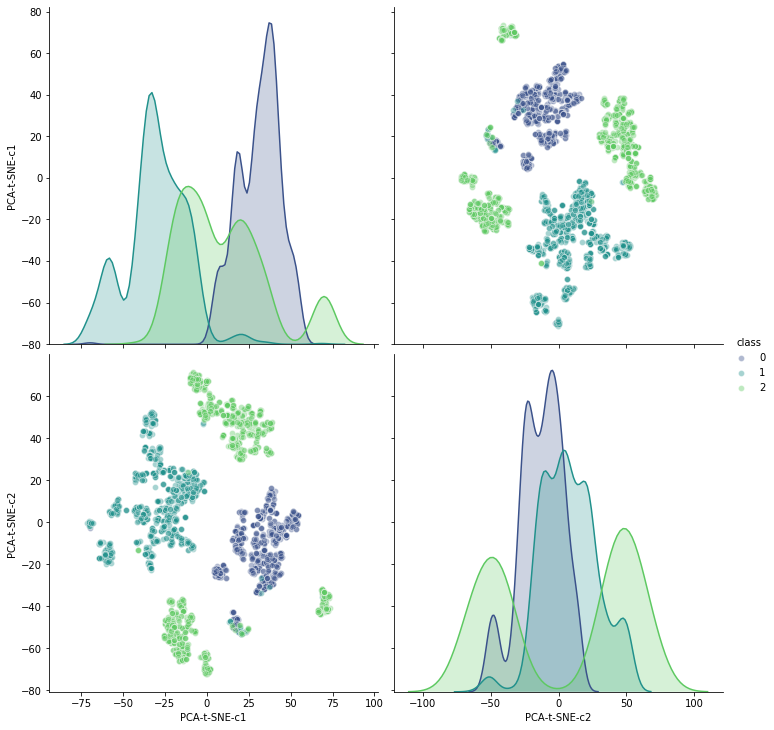

In [41]:
sns.pairplot(df, hue='class', vars=['PCA-t-SNE-c1', 'PCA-t-SNE-c2'], palette='viridis', 
             size=5, markers='o', plot_kws={'alpha':0.4});

### Prepare deep learning for protein classification

In [ ]:
!pip install keras tensorflow

     |█                               | 3.6 MB 145 kB/s eta 0:13:24

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

Transform vectors in numpy array and save protein classes

In [ ]:
df_subset = df.iloc[::1, :] # takes every x-th value in df

In [ ]:
X = np.array([x.vec for x in df_subset['Protein_vector']])
y = df_subset['class']

In [ ]:
df.head(4)

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

In [45]:
y[0:5]

NameError: name 'y' is not defined

In [ ]:
dummy_y[:10]

Define deep learning model

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    # input layer
    model.add(Dense(100, input_dim=100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    # hidden layer
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

Define model settings

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=50, batch_size=32, verbose=0)

In [ ]:
estimator

Define number of crossvalidation

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

Predict probabilities for classes

In [ ]:
startTime = datetime.now()

proba = cross_val_predict(estimator, X, dummy_y, cv=kfold, method='predict_proba')
print (datetime.now() - startTime)


Get predicted class

In [ ]:
prob_class = list()

for X in proba:
    
    new_class = np.argmax(X)
    prob_class.append(new_class)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('talk', font_scale=2)
from helpers import confusion_matrix_plot

In [ ]:
probs = np.asarray(prob_class)

In [ ]:
probs

In [ ]:
print("Prediction accuracy: %.2f%%" % (accuracy_score(df_subset['class'], probs)*100))

Get confusion matrix of prediction

In [ ]:
cm = confusion_matrix(df_subset['class'], prob_class,labels=[0, 1, 2])

In [ ]:
confusion_matrix_plot(cm, names=[0,1,2]);



Copyright (C) 2017 by Sabrina Jaeger and Samo Turk, BioMed X GmbH

This work is licensed under the Creative Commons Attribution-ShareAlike 4.0 License. To view a copy of this license, visit https://creativecommons.org/licenses/by-sa/4.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.
